# Perform the correlation analysis between lexical and the top down features

**Research questions**: 
- What is the correlation between top down approaches and bottom up approaches for stylometry analysis ?

-> Read the arguments of Paul

In [57]:
import pandas as pd
import seaborn as sns
import numpy as np

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

## Load the data

In [39]:
top_down = pd.read_csv('../data/cleaned/top_down/top_down.csv')

lexico_inflected = pd.read_csv('../data/cleaned/bottom_up/lexicometric/bottom_up_inflected.csv')
lexico_not_inflected = pd.read_csv('../data/cleaned/bottom_up/lexicometric/bottom_up_not_inflected.csv')

### And now ????

- Compute the use of vocabulary.
- Compute the use of theme.

In [64]:
lexico_not_inflected.shape

(1145, 1763)

In [66]:
# Apply PCA to the bottom up data

from sklearn.decomposition import PCA

N_COMPONENTS = 500
pca = PCA(n_components=N_COMPONENTS)
reduced_df = pd.DataFrame(pca.fit_transform(lexico_not_inflected[lexico_not_inflected.columns[:-4]]), columns = [f"PC{i}" for i in range(1, N_COMPONENTS+1)])
reduced_df = reduced_df.assign(ix=lexico_not_inflected['ix'])

print("====")
print(np.cumsum(pca.explained_variance_ratio_))

====
[0.01450404 0.02585905 0.03640338 0.04649175 0.05551348 0.06386707
 0.07196242 0.07966448 0.08729073 0.09470473 0.10181428 0.10853718
 0.11520441 0.12148218 0.12754773 0.13355004 0.13946198 0.14526683
 0.1508067  0.15628813 0.16160103 0.16684537 0.17207462 0.1771915
 0.18224713 0.18725174 0.19214886 0.19696506 0.20175641 0.20644571
 0.21106928 0.21568231 0.22020329 0.22460985 0.22894314 0.23320997
 0.23745013 0.2416629  0.24575102 0.24976288 0.25375234 0.25765634
 0.26153059 0.26538348 0.26915245 0.27287395 0.27655951 0.28020819
 0.28381149 0.28729231 0.29076722 0.29417049 0.29754446 0.30090741
 0.3042605  0.30755756 0.31079789 0.31401815 0.31720208 0.32035364
 0.32348259 0.32658004 0.32966613 0.33273954 0.33577478 0.33879666
 0.3418097  0.34476041 0.34769089 0.35057731 0.35342806 0.35624452
 0.3590408  0.36183118 0.36460478 0.36735229 0.37007612 0.37277954
 0.37543872 0.37807746 0.38070241 0.38330664 0.38588492 0.38845662
 0.39098733 0.39350091 0.39600173 0.39849682 0.40097233 0.

In [73]:
full_df = pd.merge(reduced_df, top_down, on="ix", how='right')

In [75]:
categories = full_df["category"].unique().tolist()

/var/folders/mx/dypq299j3v12z8t3c_n3rxvh0000gq/T/ipykernel_62146/3955708347.py:1: UserWarning: The palette list has more values (19) than needed (5), which may not be intended.
  sns.scatterplot(data=full_df, x="PC1", y="PC2", hue="book", palette=sns.color_palette("hsv", len(categories)))


<Axes: xlabel='PC1', ylabel='PC2'>

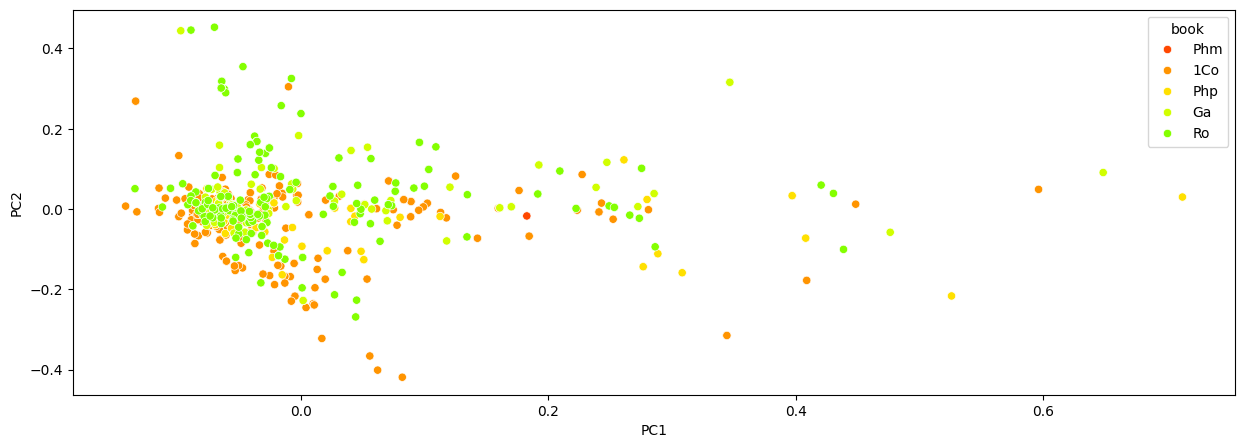

In [76]:
sns.scatterplot(data=full_df, x="PC1", y="PC2", hue="book", palette=sns.color_palette("hsv", len(categories)))

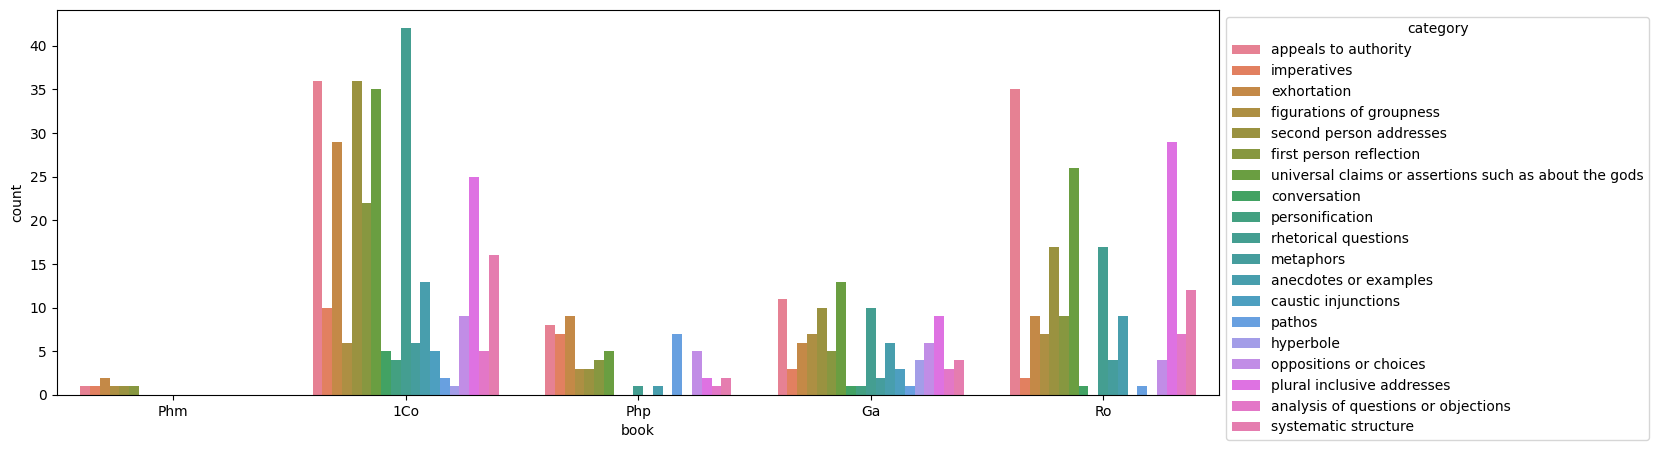

In [81]:
ax = sns.countplot(data=full_df, x="book", hue="category")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))